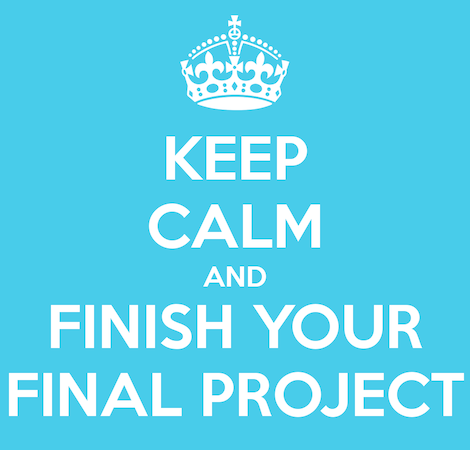

# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [1]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()
data=data[:400000]

<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

In [2]:
# I used google to find a convertor to timezone
!pip3 install us 


<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i style="font-size:40px;color:#c1f0c1;">Solution Description</i>
   
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
The solution is divided into few stages:<br>
1. <b>Exploratory Analysis</b> - Learnning the data, understanding each feature and its efect on the "click" column.<br>
2. <b>Clean Data</b> - Some columns are meanless unless we divide them, classify them, or enrich them. For example
   <br><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;utc_time</b> - I choose to split it into is_weekend, Month, Hour  and date
   <br><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;app_id</b> - I choose to replace it with data from zip files. <br>
3. <b>Feature Selection</b> - I used "DesictionTree" and "Recursive Feature Elimination" - to check the influence of each column on "click" column.<br>
4. <b>Balance- using undersample to fix imblance data.</b><br>
5. <b>Run the Classifiers</b> - I used "Logistic regresstion", "DecisionTreeClassifier", "RandomForestClassifier" <br>


</div>

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i style="font-size:40px;color:#fffff;">Improvement  </i>
   
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
<br><b>There are some changes I would make and did not deliver due to shortness of time:<br>
Check for additional dependencies between variables.
<br>  User_isp may have an effect and I still removed it because of many entries that were missing.<br>
<br>Additional parameters from the zip file.<br>
<br>Testing against additional models and improving the hyperparameters <br>
</div>
    

In [3]:
## imports
import seaborn as sns
import pandas as pd
import numpy as np
import pytz
import datetime
from datetime import  timezone
import datetime

import us
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Analysis & Clean Data

In [4]:
data.info()
#we can see we have columns that are categorial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   bidid          400000 non-null  object
 1   utc_time       400000 non-null  int64 
 2   app_id         400000 non-null  object
 3   user_state     400000 non-null  object
 4   user_isp       399997 non-null  object
 5   device_maker   282047 non-null  object
 6   device_model   282049 non-null  object
 7   device_osv     400000 non-null  object
 8   device_height  400000 non-null  int64 
 9   device_width   400000 non-null  int64 
 10  marketplace    400000 non-null  object
 11  click          400000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 36.6+ MB


In [5]:
data.user_state.unique()  # see all posible states

array(['TX', 'LA', 'TN', 'NC', 'FL', 'GA', 'ME', 'UT', 'OH', 'MN', 'IL',
       'WA', 'IN', 'MO', 'ID', 'VA', 'NJ', 'AZ', 'RI', 'DC', 'CA', 'WI',
       'AL', 'MS', 'CT', 'MD', 'NY', 'PA', 'MI', 'CO', 'MA', 'ND', 'KY',
       'WY', 'IA', 'DE', 'AR', 'OK', 'KS', 'SC', 'NM', 'HI', 'NH', 'NV',
       'AK', 'MT', 'SD', 'NE', 'OR', 'WV', 'VT'], dtype=object)

In [6]:
# create dict for all timezones 
all_posible_states = data.user_state.unique()
dict_state_to_timezone = {}
for nState in all_posible_states:
    dict_state_to_timezone[nState] = us.states.lookup(nState).capital_tz


dict_state_to_timezone

{'TX': 'America/Chicago',
 'LA': 'America/Chicago',
 'TN': 'America/Chicago',
 'NC': 'America/New_York',
 'FL': 'America/New_York',
 'GA': 'America/New_York',
 'ME': 'America/New_York',
 'UT': 'America/Denver',
 'OH': 'America/New_York',
 'MN': 'America/Chicago',
 'IL': 'America/Chicago',
 'WA': 'America/Los_Angeles',
 'IN': 'America/Indiana/Indianapolis',
 'MO': 'America/Chicago',
 'ID': 'America/Denver',
 'VA': 'America/New_York',
 'NJ': 'America/New_York',
 'AZ': 'America/Phoenix',
 'RI': 'America/New_York',
 'DC': 'America/New_York',
 'CA': 'America/Los_Angeles',
 'WI': 'America/Chicago',
 'AL': 'America/Chicago',
 'MS': 'America/Chicago',
 'CT': 'America/New_York',
 'MD': 'America/New_York',
 'NY': 'America/New_York',
 'PA': 'America/New_York',
 'MI': 'America/New_York',
 'CO': 'America/Denver',
 'MA': 'America/New_York',
 'ND': 'America/North_Dakota/Center',
 'KY': 'America/New_York',
 'WY': 'America/Denver',
 'IA': 'America/Chicago',
 'DE': 'America/New_York',
 'AR': 'America/Ch

In [7]:
from datetime import datetime
def convert_utc_time(r):
    tzone, timestamp = r.split('@')
    x = datetime.fromtimestamp(float(timestamp)/1000).replace(tzinfo=timezone.utc).astimezone(pytz.timezone(tzone)).timetuple()
    return list(x)[0:4]

data['TZ'] = data.apply(lambda r: dict_state_to_timezone[r['user_state']] + '@' + str(r['utc_time']), axis=1)
data['year'], data['month'] ,data['day'],data['hour']= zip(*data['TZ'].map(convert_utc_time))
data.drop('TZ',axis=1,inplace=True)
data.drop('utc_time',axis=1,inplace=True)
data

,bidid,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,year,month,day,hour
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,2018,9,8,17
1,9284441f-a6ea-4698-9017-86436b92d416,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,2018,9,8,17
2,7e4779c2-f757-4324-8c2a-138b558b5a54,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,2018,9,8,17
3,b64ea208-38ca-42ac-895e-0842d7352cc3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,2018,9,8,17
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,2018,9,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,d0fd4931-f6d1-4adc-8a9a-249c67fcf086,com.otherguys.lindab,TX,Comcast Cable,LG,LM-X210(G),7.1.2,720,1280,chartboost,0,2018,10,3,18
399996,a2390809-f27c-48ba-9119-4e3254188428,slots.free.withbonus.casino.redhot777,MS,Comcast Cable,LG,VS501,7.0,720,1280,chartboost,0,2018,10,3,18
399997,3986c43b-ec9a-4f7c-a043-5fd6f1f3c295,com.ketchapp.rider,NJ,Optimum Online,Google,Pixel XL,9,1920,1080,chartboost,0,2018,10,3,19
399998,3ef28029-3cde-467f-a3c1-0e1c35f6be11,com.eweapons.revolvergunssim,FL,Comcast Cable,Samsung,SM-G892A,8.0.0,1080,1920,chartboost,0,2018,10,3,19


In [8]:
## adding weekend columns to see the influence on click column

In [9]:
import datetime
def is_weekend(y,m,d):
    weekday = datetime.datetime(y, m, d).weekday()

    if weekday < 5:
        return 0
    else:  # 5 Sat, 6 Sun
        return 1

data['is_weekend'] = data.apply(lambda r :is_weekend(r['year'], r['month'], r['day']), axis=1)
data.drop(['day'], axis=1, inplace=True)

In [10]:
x=data['year'].value_counts()
#all columns are in 2018- no need for year
data.drop(['year'], axis=1, inplace=True)


## after converting date and adding new column of weekend ,we want to analyze data to see if we can remove columns

In [11]:
data['device_size'] = data['device_height']*data['device_width']
# we create new columns device_size so no need for device_width and device_height-

data.drop(['device_width'], axis=1, inplace=True)
data.drop(['device_height'], axis=1, inplace=True)



In [12]:
# Assigning columns as numerical variables
numeric_cols = ['device_size', 'click', 'hour','month','is_weekend']
data[numeric_cols].describe()

,device_size,click,hour,month,is_weekend
count,4.000000e+05,400000.000000,400000.000000,400000.000000,400000.000000
mean,1.348185e+06,0.067892,13.174055,9.568267,0.364362
std,8.243990e+05,0.251562,6.327437,0.972331,0.481252
min,3.500000e+02,0.000000,0.000000,8.000000,0.000000
25%,9.216000e+05,0.000000,8.000000,9.000000,0.000000
50%,9.216000e+05,0.000000,14.000000,10.000000,0.000000
75%,2.073600e+06,0.000000,18.000000,10.000000,1.000000
max,4.492800e+06,1.000000,23.000000,11.000000,1.000000


In [13]:
# Assigning columns as categorical variables
Categorical_cols = [ 'bidid', 'app_id', 'user_state', 'user_isp', 'device_maker' ,'device_model', 'device_osv','marketplace' ]
data[Categorical_cols].describe(include = ['O'])
# Decribe method is used to give statistical information on the categorical columns

,bidid,app_id,user_state,user_isp,device_maker,device_model,device_osv,marketplace
count,400000,400000,400000,399997,282047,282049,400000,400000
unique,374000,9223,51,1926,163,1417,13,1
top,d488a154-ce82-4060-9f51-fe1585a0729c,com.banananadco.blackjack,TX,T-Mobile USA,Samsung,LM-X210(G),7.0,chartboost
freq,2,6328,53049,93841,108420,15432,138689,400000


In [14]:
data.isnull().sum()

bidid                0
app_id               0
user_state           0
user_isp             3
device_maker    117953
device_model    117951
device_osv           0
marketplace          0
click                0
month                0
hour                 0
is_weekend           0
device_size          0
dtype: int64

## conclusion
####  marketplace isn't unique.
#### bidid -  many different bidid (Unique) and also not many people belonging to a same bidid(freq). So, it probably means that this feature is having no or very less predictive power.

In [15]:
data.drop(['marketplace'], axis=1, inplace=True)
data.drop('bidid', axis=1, inplace=True)
#bidid is almost an index

#data.drop('device_maker', axis=1, inplace=True)

In [16]:
#check for unique ids
print(f'user_isp {len(data["user_isp"].unique())}')
print(f'device_maker {len(data["device_maker"].unique())}')
print(f'device_model {len(data["device_model"].unique())}')
print(f'device_osv {len(data["device_osv"].unique())}')


user_isp 1927
device_maker 164
device_model 1418
device_osv 13


In [17]:
# device_model - close to 1/3 of the data is missing, given the ratio of table size(3148828)
# to much unique 
data.drop('device_model', axis=1, inplace=True)

In [18]:
#Fill NaN for columns
data['user_isp'].fillna('unknown', inplace=True)

In [19]:
#normelize_data.info()


In [20]:
data.duplicated().sum() # displays duplicate records

36650

In [21]:
data.drop_duplicates()

,app_id,user_state,user_isp,device_maker,device_osv,click,month,hour,is_weekend,device_size
0,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,7.0,0,9,17,1,921600
1,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,7.0,0,9,17,1,921600
2,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,7.1.1,0,9,17,1,921600
3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,6.0.1,0,9,17,1,921600
4,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,7.1.1,0,9,18,1,786432
...,...,...,...,...,...,...,...,...,...,...
399993,com.zentertain.classicvegasslots,TX,Spectrum,Motorola,8.0.0,0,10,18,0,1036800
399994,com.ketchapp.rider,TX,AT&T Wireless,Samsung,7.1.1,0,10,18,0,921600
399996,slots.free.withbonus.casino.redhot777,MS,Comcast Cable,LG,7.0,0,10,18,0,921600
399997,com.ketchapp.rider,NJ,Optimum Online,Google,9,0,10,19,0,2073600


In [22]:
#check if user_state as influnce 
pd.crosstab(data['user_state'],data['click']).sort_values(1,0, ascending = False).head(10)

click,0,1
user_state,,
CA,46794,3590
TX,49554,3495
FL,31356,2295
IL,22855,1615
NY,21105,1527
GA,15214,1123
MI,14321,1018
NC,14122,1017
OH,11812,818


## Distribution and Relationship Between Variables

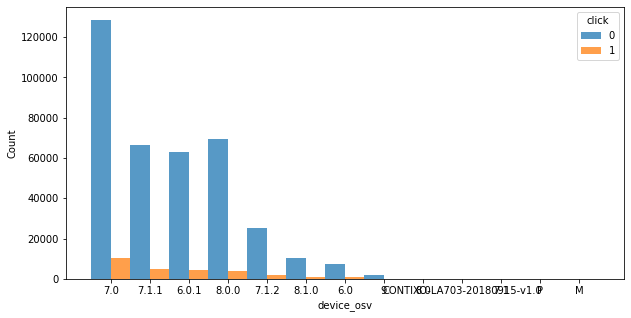

In [23]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='device_osv', hue='click', stat='count',multiple="dodge", edgecolor=None)
plt.show()

##we can see that device_osv has influnce on click 

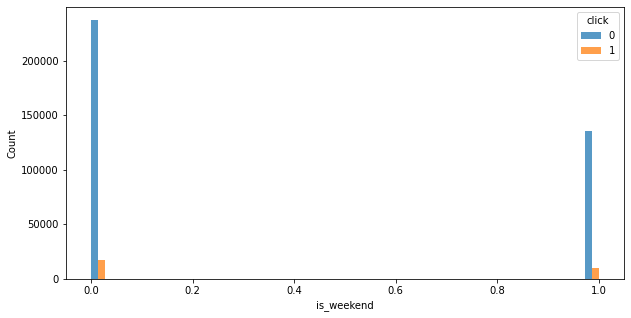

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='is_weekend', hue='click', stat='count',multiple="dodge", edgecolor=None)
plt.show()

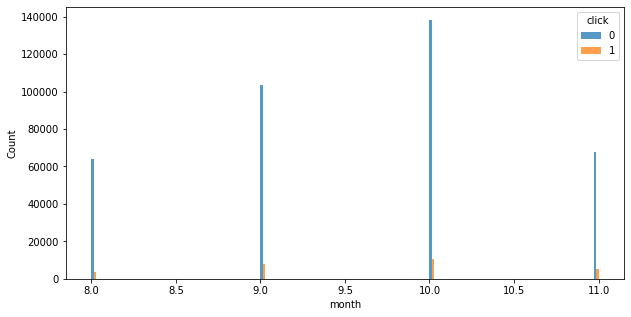

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='month', hue='click', stat='count',multiple="dodge", edgecolor=None)
plt.show() 

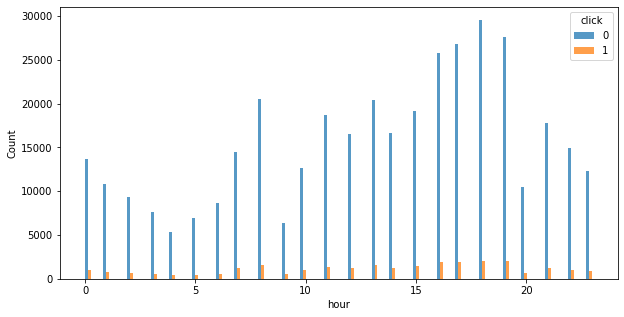

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data, x='hour', hue='click', stat='count',multiple="dodge", edgecolor=None)
plt.show()

In [27]:
#Check if data is balance - no balance data
sumzero= (data['click'] == 0).sum()
sumone= (data['click'] == 1).sum()
print(f'zero sum  {sumzero} and one sum {sumone}')

zero sum  372843 and one sum 27157


In [28]:
data

,app_id,user_state,user_isp,device_maker,device_osv,click,month,hour,is_weekend,device_size
0,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,7.0,0,9,17,1,921600
1,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,7.0,0,9,17,1,921600
2,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,7.1.1,0,9,17,1,921600
3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,6.0.1,0,9,17,1,921600
4,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,7.1.1,0,9,18,1,786432
...,...,...,...,...,...,...,...,...,...,...
399995,com.otherguys.lindab,TX,Comcast Cable,LG,7.1.2,0,10,18,0,921600
399996,slots.free.withbonus.casino.redhot777,MS,Comcast Cable,LG,7.0,0,10,18,0,921600
399997,com.ketchapp.rider,NJ,Optimum Online,Google,9,0,10,19,0,2073600
399998,com.eweapons.revolvergunssim,FL,Comcast Cable,Samsung,8.0.0,0,10,19,0,2073600


In [29]:
data['app_id'].value_counts()

com.banananadco.blackjack                                                   6328
com.mobilityware.spider                                                     5957
com.mobilityware.freecell                                                   5822
com.mobilityware.CrownSolitaire                                             5514
toy.blast.pop.cubes.puzzle                                                  5497
                                                                            ... 
com.happyDevs.android.cdentist                                                 1
com.hero.SpiderTowerDown                                                       1
com.gamewarstudios.modern.army.sniper.shooter.grand.rescue.forces.strike       1
com.redkoda.chinesepokermultiplayercn                                          1
com.gampark.belote                                                             1
Name: app_id, Length: 9223, dtype: int64

## Adding new columns from zip file

In [30]:
from zipfile import ZipFile
import pickle
from tqdm import tqdm_notebook as tqdm

app_details = ZipFile("data/play_apps.zip")

categories = []
scores = []
reviews_list = []
free_list = []
for app_id in tqdm(data.app_id):
    try:
        app_file = 'play_apps/' + app_id
        app = pickle.loads(app_details.read(app_file))
        value = app['category']
        score = float(app['score'])
        reviews = app['reviews']
        free = int(app['free'])
    except:
        value = []
        score = 0.0
        reviews = 0
        free = 0 # I assume Free apps get more banner, so default is paid app
    finally:
        categories.append(value)
        scores.append(score)
        reviews_list.append(reviews)
        free_list.append(free)

<ipython-input-30-3e4881cf961d>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for app_id in tqdm(data.app_id):


  0%|          | 0/400000 [00:00<?, ?it/s]

In [31]:
data['category'] = pd.Series(categories, index =data['app_id'].index)
data['scores'] = pd.Series(scores, index =data['app_id'].index)
data['reviews'] = pd.Series(reviews_list, index =data['app_id'].index)
data['free'] = pd.Series(free_list, index =data['app_id'].index)

In [32]:
data

,app_id,user_state,user_isp,device_maker,device_osv,click,month,hour,is_weekend,device_size,category,scores,reviews,free
0,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,7.0,0,9,17,1,921600,[GAME_SIMULATION],4.3,155129,1
1,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,7.0,0,9,17,1,921600,[GAME_CARD],4.7,11927,1
2,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,7.1.1,0,9,17,1,921600,[GAME_ARCADE],4.1,178,1
3,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,6.0.1,0,9,17,1,921600,[],0.0,0,0
4,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,7.1.1,0,9,18,1,786432,"[GAME_EDUCATIONAL, FAMILY_BRAINGAMES]",3.6,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,com.otherguys.lindab,TX,Comcast Cable,LG,7.1.2,0,10,18,0,921600,[GAME_SIMULATION],4.5,359502,1
399996,slots.free.withbonus.casino.redhot777,MS,Comcast Cable,LG,7.0,0,10,18,0,921600,[],0.0,0,0
399997,com.ketchapp.rider,NJ,Optimum Online,Google,9,0,10,19,0,2073600,[GAME_ARCADE],4.5,706593,1
399998,com.eweapons.revolvergunssim,FL,Comcast Cable,Samsung,8.0.0,0,10,19,0,2073600,[GAME_SIMULATION],4.1,4752,1


### MultiLabelBinarizer

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_mlb = mlb.fit_transform(data['category'])
data = pd.concat([data, pd.DataFrame(genre_mlb, columns=mlb.classes_)], axis=1)


In [34]:
data.drop('category',inplace=True, axis=1)
data.drop('app_id',inplace=True, axis=1)
data.drop('user_isp',inplace=True, axis=1)


In [35]:
data= pd.get_dummies(data)


In [36]:
data

,click,month,hour,is_weekend,device_size,scores,reviews,free,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,device_osv_7.1,device_osv_7.1.1,device_osv_7.1.2,device_osv_8.0,device_osv_8.0.0,device_osv_8.1.0,device_osv_9,device_osv_CONTIXO-LA703-20180915-v1.0,device_osv_M,device_osv_P
0,0,9,17,1,921600,4.3,155129,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,9,17,1,921600,4.7,11927,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9,17,1,921600,4.1,178,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,9,17,1,921600,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9,18,1,786432,3.6,35,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,10,18,0,921600,4.5,359502,1,0,0,...,0,0,1,0,0,0,0,0,0,0
399996,0,10,18,0,921600,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,0,10,19,0,2073600,4.5,706593,1,0,0,...,0,0,0,0,0,0,1,0,0,0
399998,0,10,19,0,2073600,4.1,4752,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Devide to Train and Test  

In [37]:
## split to train and Test
X_train = data[data['month'] != 11]

y_train = data[data['month'] != 11]['click']

X_test = data[data['month'] == 11]

y_test = data[data['month'] == 11]['click']

## Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = MinMaxScaler()
numeric_columns = ['device_size', 'month', 'hour','reviews']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

<ipython-input-38-e433e580bd99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-38-e433e580bd99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


## features selection- using correlations and SelectFromModel  using DecisionTreeClassifier

In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

test_data= X_train[:20000]
y = test_data['click']
X = test_data.drop('click', axis=1)
dt_selector = SelectFromModel(DecisionTreeClassifier(max_depth=5), max_features=30)
dt_selector.fit(X, y)
dt_support = dt_selector.get_support()
dt_features = X.loc[:, dt_support].columns.tolist()
for f in dt_features:
     print(f)

hour
device_size
scores
reviews
ENTERTAINMENT
GAME_CARD
GAME_CASUAL
GAME_PUZZLE
GAME_SPORTS
PERSONALIZATION
user_state_DC
user_state_KS
user_state_MA
user_state_NC
user_state_OR
user_state_UT
device_maker_ALCATEL
device_maker_Asus
device_maker_LG
device_maker_Simbans
device_osv_7.0
device_osv_7.1.1
device_osv_7.1.2


In [40]:
import numpy as np

def correlation_selector(X, y, features_num):
    correlations = []
    feature_names = X.columns

    for i in feature_names:
        correlation = np.corrcoef(X[i], y)[0, 1]
        correlations.append(correlation)
    
    # replace NaN with 0
    correlations = [0 if np.isnan(correlation) else correlation for correlation in correlations]
    feature_correlations = list(zip(feature_names, correlations))
    feature_correlations = sorted(feature_correlations, key=lambda x: np.abs(x[1]), reverse=True)
    return feature_correlations[:30]
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
results = correlation_selector(X, y,30)

for r in results:
    print(f'{r[0]: <20} {r[1]:.3f}')

GAME_CASUAL          0.057
GAME_CARD            -0.045
device_maker_LG      0.040
month                0.033
device_maker_Asus    0.029
device_osv_8.0.0     -0.028
FAMILY_EDUCATION     0.027
PERSONALIZATION      0.027
GAME_BOARD           -0.024
GAME_ARCADE          0.024
device_maker_Motorola 0.023
user_state_WV        0.023
GAME_MUSIC           0.022
device_maker_Kakatech 0.022
user_state_TX        0.020
GAME_SPORTS          0.020
user_state_IN        -0.019
ART_AND_DESIGN       0.018
device_maker_Simbans 0.018
device_maker_Barnes and Noble 0.018
ENTERTAINMENT        0.018
device_maker_Verizon 0.017
device_osv_7.0       0.017
reviews              -0.017
user_state_WI        -0.016
GAME_ROLE_PLAYING    0.016
device_osv_7.1.1     0.015
GAME_SIMULATION      -0.015
device_size          -0.015
device_maker_Lenovo  0.015


/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


### Conclution : the following column have the highest influence: GAME_CASUAL , hour,  and device maker 

In [41]:
#data = pd.read_csv('data/data_afterClean_before_getDummies.csv')

In [42]:
#data.to_csv('data/data_afterClean_before_getDummies.csv', index = False, header=True)

In [43]:

#data.to_csv('data/data_afterClean_after_getdummies.csv', index = False, header=True)

### imbalance data -undersample

In [44]:
#Try to handle imbalance
!pip install -U imbalanced-learn
!sudo python -m pip install imbalanced-learn
!sudo python -m pip install delayed

/bin/bash: pip: command not found


In [45]:
#data = pd.read_csv('data/data_afterClean_after_getdummies.csv')
#data= data[:200]
X_train.drop('click', axis=1 ,inplace=True)
X_test.drop('click', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


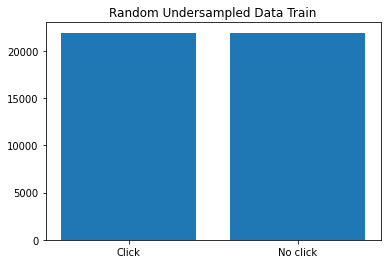

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler


#data = pd.read_csv('data/data_afterClean_after_getdummies.csv')
#data= data[:2000000]


#Since there are much more '0' clicks than '1' clicks, I will undersample 
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

plt.bar(['Click', 'No click'], height=[sum(y_undersampled==0), sum(y_undersampled==1)])
plt.title('Random Undersampled Data Train')
plt.show()

## Train the model

In [47]:
X_train

,month,hour,is_weekend,device_size,scores,reviews,free,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,device_osv_7.1,device_osv_7.1.1,device_osv_7.1.2,device_osv_8.0,device_osv_8.0.0,device_osv_8.1.0,device_osv_9,device_osv_CONTIXO-LA703-20180915-v1.0,device_osv_M,device_osv_P
0,0.5,0.739130,1,0.205066,4.3,0.005467,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.5,0.739130,1,0.205066,4.7,0.000420,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.5,0.739130,1,0.205066,4.1,0.000006,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.5,0.739130,1,0.205066,0.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.5,0.782609,1,0.174978,3.6,0.000001,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,1.0,0.782609,0,0.205066,4.5,0.012670,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
399996,1.0,0.782609,0,0.205066,0.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,1.0,0.826087,0,0.461497,4.5,0.024902,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
399998,1.0,0.826087,0,0.461497,4.1,0.000167,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
def fitPredictAndPrint(model, X_train, y_train, X_test, y_test, label):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(label)
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print(classification_report(y_true=y_test, y_pred = y_pred))
    print("*****************************************************")
    
def predictAndPrint(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    print(label)
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print(classification_report(y_true=y_test, y_pred = y_pred))
    print("*****************************************************")

In [49]:
X_undersampled


,month,hour,is_weekend,device_size,scores,reviews,free,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,device_osv_7.1,device_osv_7.1.1,device_osv_7.1.2,device_osv_8.0,device_osv_8.0.0,device_osv_8.1.0,device_osv_9,device_osv_CONTIXO-LA703-20180915-v1.0,device_osv_M,device_osv_P
0,0.0,0.652174,0,0.230709,4.2,0.000086,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.5,0.956522,0,0.205066,4.4,0.000244,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.5,0.478261,1,0.461497,4.2,0.001823,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.5,0.391304,0,0.461497,4.6,0.003962,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.5,0.521739,0,0.091169,4.2,0.000250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43889,0.0,0.565217,0,0.091169,0.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43890,0.0,0.608696,0,0.205066,4.5,1.000000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
43891,0.0,0.521739,0,0.205066,4.8,0.002222,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43892,1.0,0.478261,1,0.205066,3.7,0.000383,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
verbose=2

dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=10)
dtc.fit(X_undersampled, y_undersampled)

# Check the model on the test data

predictAndPrint(dtc,X_test,y_test, "Descition Tree")
print (f'\nDecisionTreeClassifier score : {dtc.score(X_test, y_test)}')

Descition Tree
[[18394 49182]
 [ 1018  4192]]
              precision    recall  f1-score   support

           0       0.95      0.27      0.42     67576
           1       0.08      0.80      0.14      5210

    accuracy                           0.31     72786
   macro avg       0.51      0.54      0.28     72786
weighted avg       0.89      0.31      0.40     72786

*****************************************************

DecisionTreeClassifier score : 0.31030692715632124


In [51]:
data

,click,month,hour,is_weekend,device_size,scores,reviews,free,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,device_osv_7.1,device_osv_7.1.1,device_osv_7.1.2,device_osv_8.0,device_osv_8.0.0,device_osv_8.1.0,device_osv_9,device_osv_CONTIXO-LA703-20180915-v1.0,device_osv_M,device_osv_P
0,0,9,17,1,921600,4.3,155129,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,9,17,1,921600,4.7,11927,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9,17,1,921600,4.1,178,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,9,17,1,921600,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9,18,1,786432,3.6,35,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,10,18,0,921600,4.5,359502,1,0,0,...,0,0,1,0,0,0,0,0,0,0
399996,0,10,18,0,921600,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,0,10,19,0,2073600,4.5,706593,1,0,0,...,0,0,0,0,0,0,1,0,0,0
399998,0,10,19,0,2073600,4.1,4752,1,0,0,...,0,0,0,0,1,0,0,0,0,0


 # LogisticRegression

In [52]:

lr = LogisticRegression()
fitPredictAndPrint(lr, X_undersampled, y_undersampled, X_test, y_test, "Linear regression")
print (f'\nLogisticRegression score : {lr.score(X_test, y_test)}')


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear regression
[[21789 45787]
 [ 1155  4055]]
              precision    recall  f1-score   support

           0       0.95      0.32      0.48     67576
           1       0.08      0.78      0.15      5210

    accuracy                           0.36     72786
   macro avg       0.52      0.55      0.31     72786
weighted avg       0.89      0.36      0.46     72786

*****************************************************

DecisionTreeClassifier score : 0.35506828236199267


##  Running GridSearchCV - best params for RandomForestClassifier

In [53]:
from sklearn.model_selection import GridSearchCV 
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from pprint import pprint 


model_params = {
    'n_estimators': [4, 10, 50, 100, 204],
    'max_features': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 5, 10]
}

rf_model = RandomForestClassifier()
clf = GridSearchCV(rf_model, model_params, cv=5)
model = clf.fit(X_undersampled, y_undersampled)
# print hyperparameters
print(model.best_estimator_.get_params())

Initialize the model ...


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier


print("Initialize the model ...")
rf = RandomForestClassifier(**model.best_params_)

print("Run the model ...")
rf.fit(X_undersampled, y_undersampled)
print("Run the model ...END")

# Check the model on the test data
print(f'Train Score: {rf.score(X_train, y_train)}\nTest Score: {rf.score(X_test, y_test)}')

predictAndPrint(rf,X_test,y_test ,"RandomForestClassifier")
print (f'\nRandomForestClassifier score : {rf.score(X_test, y_test)}')

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


print("Prepering the Model ...")
k = int(np.sqrt(len(X_undersampled)))
knn = KNeighborsClassifier(n_neighbors=k)

print("Run the Model ...") 
knn.fit(X_undersampled, y_undersampled)
predictAndPrint(knn,X_test,y_test ,"RandomForestClassifier")
print (f'\nKNN score : {rf.score(X_test, y_test)}')
# print("Run the Model Done, building the score")
# print(f'knn.score on the train = {knn.score(X_undersampled, y_undersampled)}')
# print(f'knn.score on the test = {knn.score(X_test, y_test)}')    

errors = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_undersampled, y_undersampled)
    errors.append(1 - knn.score(X_test, y_test))
    print(f'round number {k}')
    
print("Done")

Prepering the Model ...
Run the Model ...


# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm

mf_list = [2, 4, 8, 16, 32, 64, 258]
lr_list = [0.1, 0.2, 0.4, 0.01, 1]


best_score = 0

for max_f in tqdm(mf_list):
    for learnning_rate in  lr_list:
        gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learnning_rate, max_features=max_f, max_depth=2)
        gb_clf.fit(x_train, y_train)
        
        train_score = gb_clf.score(X_undersampled, y_undersampled)
        test_score = gb_clf.score(X_test, y_test)
        print(f'Train score = {train_score}, Test score = {test_score}')
        
        if(best_score < train_score):
            best_score = train_score
            
print(f'Best Score: {best_score}')  

In [ ]:
<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i style="font-size:40px;color:#e6f1ff;">Conclusion</i>
</div>
<div>
<p style="line-height:1.75;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
<br>see results below- the result was testing on 400000 rows from the original data <br>
<br>the best score  <br>
</p></div>

In [ ]:
# Linear regression
# [[21789 45787]
#  [ 1155  4055]]
#               precision    recall  f1-score   support

#            0       0.95      0.32      0.48     67576
#            1       0.08      0.78      0.15      5210

#     accuracy                           0.36     72786
#    macro avg       0.52      0.55      0.31     72786
# weighted avg       0.89      0.36      0.46     72786

# *****************************************************

# Linear regression score : 0.35506828236199267

In [ ]:
# Descition Tree
# [[18394 49182]
#  [ 1018  4192]]
#               precision    recall  f1-score   support

#            0       0.95      0.27      0.42     67576
#            1       0.08      0.80      0.14      5210

#     accuracy                           0.31     72786
#    macro avg       0.51      0.54      0.28     72786
# weighted avg       0.89      0.31      0.40     72786

# *****************************************************

# DecisionTreeClassifier score : 0.31030692715632124

In [ ]:
!aws s3 cp "/home/ubuntu/notebooks/intro_to_ml/day_6/Final_Project_yafit3_new.ipynb"  s3://uatt-e1-yafith/day6/